# MoNuSeg Data Preparation

Nuclei segmentation of stained tissue images of tumor patients in MICCAI2018 [challenge](https://monuseg.grand-challenge.org/Data/). The data contains about 30 images and a corresponding mask. Use fast.ai and Unet architectures to do nuclei segmentation. 

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#from fastai.conv_learner import *
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
path = "data/BreathPathQ/jr-breastpathq/datasets/MoNuSegTraining/"
path_tissue=path+ 'TissueImages/'
path_mask=path+ 'LabeledNucImages/'

In [4]:
!ls {path}

Annotations
GenerateMask_for_MoNuSeg.ipynb
LabeledNucImages
NucCentroids
TissueImages
bwmask125
generate_binary_mask.m
he_to_binary_mask_final.m
mask125
mask250
mask500
tissue125
tissue250
tissue500
torch_models


In [3]:
import glob

In [26]:
filenames= glob.glob(path_tissue+'*.tif')
filenames= [os.path.basename(x) for x in filenames]


In [25]:
img=plt.imread(f'{path_tissue}'+filenames[0])

TypeError: float() argument must be a string or a number, not 'TiffImageFile'

In [14]:
img.size

(1000, 1000)

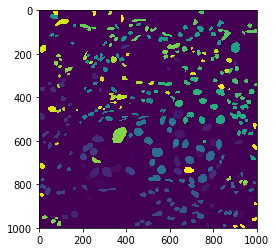

In [27]:
mask_filenames=os.listdir(path_mask)

img_mask = Image.open(f'{path_mask}'+mask_filenames[0]);
plt.imshow(img_mask)

In [26]:
img_mask.mode

'RGBA'

In [28]:
img_mask.size

(1000, 1000)

## Croping images and save them into 500 pixelsfolders

In [27]:
os.mkdir(f'{path}'+'tissue-500')
os.mkdir(f'{path}'+'mask-500')

In [30]:
!ls {path}

Annotations	  mask-500	tissue-500    torch_models
LabeledNucImages  NucCentroids	TissueImages


In [28]:
filename=filenames[0]
filename[:12]

'TCGA-18-5592'

In [3]:
import imageio
import skimage.io as io

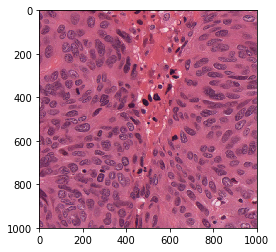

In [39]:

#from skimage import 

im = imageio.imread(path_tissue+filename)
plt.imshow(im)

In [40]:
im.shape

(1000, 1000, 3)

In [12]:
def crop_im(im,xoff,yoff,width):
    crop = im[xoff:xoff+width,yoff:yoff+width,:]
    return crop

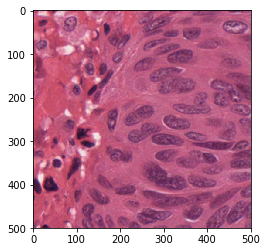

In [57]:
crop1 = crop_im(im,0,500,500)
plt.imshow(crop1)

In [63]:
#save crop image with 500 pixelsize 
save_path=f'{path}'+'tissue-500/'

for file in filenames:
    img=imageio.imread(path_tissue+file)
    width=img.shape[0]
    new_width=int(width/2)
    crop0=crop_im(img,0,0,new_width)
    crop1=crop_im(img,0,new_width,new_width)
    crop2=crop_im(img,new_width,0,new_width)
    crop3=crop_im(img,new_width,new_width,new_width)
    name=file[:12]
    io.imsave(save_path+name+'-0.tif',crop0)
    io.imsave(save_path+name+'-1.tif',crop1)  
    io.imsave(save_path+name+ '-2.tif',crop2)
    io.imsave(save_path+name+'-3.tif',crop3) 
    print(file)    



TCGA-18-5592-01Z-00-DX1.tif
TCGA-21-5784-01Z-00-DX1.tif
TCGA-21-5786-01Z-00-DX1.tif
TCGA-38-6178-01Z-00-DX1.tif
TCGA-49-4488-01Z-00-DX1.tif
TCGA-50-5931-01Z-00-DX1.tif
TCGA-A7-A13E-01Z-00-DX1.tif
TCGA-A7-A13F-01Z-00-DX1.tif
TCGA-AR-A1AK-01Z-00-DX1.tif
TCGA-AR-A1AS-01Z-00-DX1.tif
TCGA-AY-A8YK-01A-01-TS1.tif
TCGA-B0-5698-01Z-00-DX1.tif
TCGA-B0-5710-01Z-00-DX1.tif
TCGA-B0-5711-01Z-00-DX1.tif
TCGA-CH-5767-01Z-00-DX1.tif
TCGA-DK-A2I6-01A-01-TS1.tif
TCGA-E2-A14V-01Z-00-DX1.tif
TCGA-E2-A1B5-01Z-00-DX1.tif
TCGA-G2-A2EK-01A-02-TSB.tif
TCGA-G9-6336-01Z-00-DX1.tif


C:\Users\COM\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7472: UserWarning: unexpected end of lzw stream (code 0)
  warnings.warn("unexpected end of lzw stream (code %i)" % code)
C:\Users\COM\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:3284: UserWarning: invalid tile data
  warnings.warn("invalid tile data")


TCGA-G9-6348-01Z-00-DX1.tif
TCGA-G9-6356-01Z-00-DX1.tif
TCGA-G9-6362-01Z-00-DX1.tif
TCGA-G9-6363-01Z-00-DX1.tif
TCGA-HE-7128-01Z-00-DX1.tif
TCGA-HE-7129-01Z-00-DX1.tif
TCGA-HE-7130-01Z-00-DX1.tif
TCGA-KB-A93J-01A-01-TS1.tif
TCGA-NH-A8F7-01A-01-TS1.tif
TCGA-RD-A8N9-01A-01-TS1.tif


In [73]:
mask_filenames= glob.glob(path_mask+'*.png')
mask_filenames= [os.path.basename(x) for x in mask_filenames]

In [75]:
#save crop mask image with 500 pixelsize 
save_path=f'{path}'+'mask500/'
from_path = path_mask

for file in mask_filenames:
    img=imageio.imread(from_path+file)
    width=img.shape[0]
    new_width=int(width/2)
    crop0=crop_im(img,0,0,new_width)
    crop1=crop_im(img,0,new_width,new_width)
    crop2=crop_im(img,new_width,0,new_width)
    crop3=crop_im(img,new_width,new_width,new_width)
    name=file[:12]
    io.imsave(save_path+name+'-0.png',crop0)
    io.imsave(save_path+name+'-1.png',crop1)  
    io.imsave(save_path+name+ '-2.png',crop2)
    io.imsave(save_path+name+'-3.png',crop3) 
    #print(file)    

## Croping image into 250 pixels folder

In [22]:
os.mkdir(f'{path}'+'tissue250')
os.mkdir(f'{path}'+'mask250')

In [23]:
mask_filenames= glob.glob(f'{path}mask500/'+'*.png')
mask_filenames= [os.path.basename(x) for x in mask_filenames]


In [24]:
save_path=f'{path}'+'mask250/'
from_path = f'{path}'+'mask500/'

for file in mask_filenames:
    img=imageio.imread(from_path+file)
    width=img.shape[0]
    new_width=int(width/2)
    crop0=crop_im(img,0,0,new_width)
    crop1=crop_im(img,0,new_width,new_width)
    crop2=crop_im(img,new_width,0,new_width)
    crop3=crop_im(img,new_width,new_width,new_width)
    name=file[:14]
    io.imsave(save_path+name+'0.png',crop0)
    io.imsave(save_path+name+'1.png',crop1)  
    io.imsave(save_path+name+ '2.png',crop2)
    io.imsave(save_path+name+'3.png',crop3) 


C:\Users\COM\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: C:/Users/COM/Documents/PythonExcercises/breastcancer/breastpathq/datasets/MoNuSegTraining/mask250/TCGA-NH-A8F7-00.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [17]:
os.mkdir(f'{path}'+'tissue125')
os.mkdir(f'{path}'+'mask125')

In [25]:
mask_filenames= glob.glob(f'{path}mask250/'+'*.png')
mask_filenames= [os.path.basename(x) for x in mask_filenames]


In [26]:
len(mask_filenames)

480

In [27]:
save_path=f'{path}'+'mask125/'
from_path = f'{path}'+'mask250/'

for file in mask_filenames:
    img=imageio.imread(from_path+file)
    width=img.shape[0]
    new_width=int(width/2)
    crop0=crop_im(img,0,0,new_width)
    crop1=crop_im(img,0,new_width,new_width)
    crop2=crop_im(img,new_width,0,new_width)
    crop3=crop_im(img,new_width,new_width,new_width)
    name=file[:15]
    io.imsave(save_path+name+'0.png',crop0)
    io.imsave(save_path+name+'1.png',crop1)  
    io.imsave(save_path+name+ '2.png',crop2)
    io.imsave(save_path+name+'3.png',crop3) 

C:\Users\COM\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: C:/Users/COM/Documents/PythonExcercises/breastcancer/breastpathq/datasets/MoNuSegTraining/mask125/TCGA-21-5784-103.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\COM\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: C:/Users/COM/Documents/PythonExcercises/breastcancer/breastpathq/datasets/MoNuSegTraining/mask125/TCGA-21-5784-113.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\COM\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: C:/Users/COM/Documents/PythonExcercises/breastcancer/breastpathq/datasets/MoNuSegTraining/mask125/TCGA-21-5784-303.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\COM\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: C:/Users/COM/Documents/PythonExcercises/breastcancer/breastpathq/datasets/MoNuSegTraining/mask125/TCGA-50-5931-002.png is a low 

In [28]:
tissue_filenames= glob.glob(f'{path}tissue500/'+'*.tif')
tissue_filenames= [os.path.basename(x) for x in tissue_filenames]

In [29]:
save_path=f'{path}'+'tissue250/'
from_path = f'{path}'+'tissue500/'

for file in tissue_filenames:
    img=imageio.imread(from_path+file)
    width=img.shape[0]
    new_width=int(width/2)
    crop0=crop_im(img,0,0,new_width)
    crop1=crop_im(img,0,new_width,new_width)
    crop2=crop_im(img,new_width,0,new_width)
    crop3=crop_im(img,new_width,new_width,new_width)
    name=file[:14]
    io.imsave(save_path+name+'0.tif',crop0)
    io.imsave(save_path+name+'1.tif',crop1)  
    io.imsave(save_path+name+ '2.tif',crop2)
    io.imsave(save_path+name+'3.tif',crop3) 

C:\Users\COM\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\COM\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\COM\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\COM\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))


In [30]:
tissue_filenames= glob.glob(f'{path}tissue250/'+'*.tif')
tissue_filenames= [os.path.basename(x) for x in tissue_filenames]

In [31]:
save_path=f'{path}'+'tissue125/'
from_path = f'{path}'+'tissue250/'

for file in tissue_filenames:
    img=imageio.imread(from_path+file)
    width=img.shape[0]
    new_width=int(width/2)
    crop0=crop_im(img,0,0,new_width)
    crop1=crop_im(img,0,new_width,new_width)
    crop2=crop_im(img,new_width,0,new_width)
    crop3=crop_im(img,new_width,new_width,new_width)
    name=file[:15]
    io.imsave(save_path+name+'0.tif',crop0)
    io.imsave(save_path+name+'1.tif',crop1)  
    io.imsave(save_path+name+ '2.tif',crop2)
    io.imsave(save_path+name+'3.tif',crop3) 

# Convert the mask to gray scale 

In [29]:
os.mkdir(f'{path}'+'bwmask500')

In [35]:
mask_filenames= glob.glob(f'{path}LabeledNucImages/'+'*.png')
mask_filenames= [os.path.basename(x) for x in mask_filenames]

In [8]:
import imageio

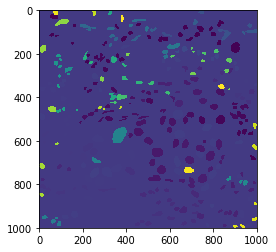

In [36]:
mask=mask_filenames[0]
img=imageio.imread(f'{path}LabeledNucImages/'+mask)
plt.imshow(img[:,:,0])

In [10]:
import skimage
from skimage import data
from skimage.filters import threshold_otsu,threshold_adaptive
from skimage.color import rgb2grey

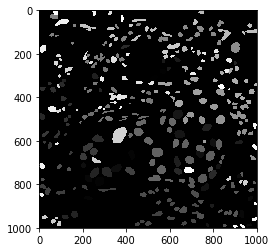

In [37]:
grey = rgb2grey(img)
plt.imshow(grey,cmap='gray')

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/filters/thresholding.py:221: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/filters/thresholding.py:223: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


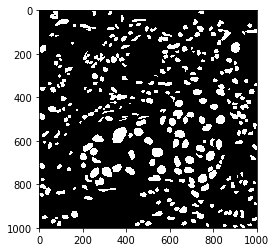

In [38]:
bw=threshold_adaptive(grey,59)

plt.imshow(bw,cmap='gray')

In [21]:
#img=imageio.imread(f'{path}'+'mask500/'+file)
len(mask_filenames)

120

In [22]:
import imageio
import skimage.io as io
from skimage import img_as_uint

In [39]:
save_path=f'{path}'+'bwmask1000/'
from_path = f'{path}'+'LabeledNucImages/'

for file in mask_filenames:
    img=imageio.imread(from_path+file)
    grey=rgb2grey(img)
    bw=threshold_adaptive(grey,59)
    name=file.replace('.png','.tif')
    io.imsave(save_path+name,img_as_uint(bw)) 
    

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/filters/thresholding.py:221: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/filters/thresholding.py:223: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/filters/thresholding.py:221: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/filters/thresholding.py:221: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/filters/thresholding.py:223: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/filters/thresholding.py:221: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/filters/thresholding.py:221: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/filters/thresholding.py:223: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/filters/thresholding.py:221: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-

In [51]:
img=imageio.imread(save_path+name)

C:\Users\COM\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\COM\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\COM\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\COM\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))


In [9]:

os.mkdir(f'{path}'+'bwmask128')

In [4]:
import cv2

In [5]:
mask_filenames= glob.glob(f'{path}bwmask125/'+'*.tif')
mask_filenames= [os.path.basename(x) for x in mask_filenames]

In [6]:
save_path=f'{path}'+'bwmask128/'
from_path = f'{path}'+'bwmask125/'

In [ ]:
for file in mask_filenames:
    img=cv2.imread(from_path+file,0)
    res= cv2.resize(img,(128,128))
    thres,bw = cv2.threshold(res,50,1,200)
    cv2.imwrite(save_path+file,bw*255 ) 

In [73]:
mask = cv2.imread(f'{path}bwmask125/'+mask_filenames[0],0)

In [75]:
res= cv2.resize(mask,(128,128))

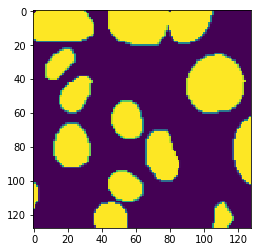

In [18]:
plt.imshow(res)

In [33]:
import numpy as np
from skimage.filters import threshold_otsu,threshold_adaptive

In [38]:

res.shape, np.max(res), np.min(res)

((128, 128), 215, 30)

In [59]:
thres,bw = cv2.threshold(res,40,1,200)

In [60]:
bw

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

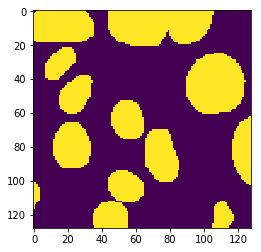

In [61]:
plt.imshow(bw)

In [42]:
np.max(bw), np.min(bw)

(1.0, 0.0)

In [45]:
bw.dtype= 'uint8'

In [65]:
cv2.imwrite(file,bw*255 ) 

True

In [66]:
img=cv2.imread(file)

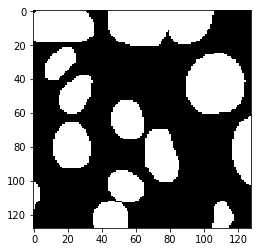

In [67]:
plt.imshow(img)